In [1]:
import numpy as np
import matplotlib.pyplot as plt
import general_coeff_funcs as gcf
from shapes import DBI

First, let's load in some coefficients we calculated earlier, describing the shape function derived from a DBI model. To use the coefficients we also need to know what $k_{min}$ and $k_{max}$ they were calculated for.

In [2]:
filename = 'dbi_example/res_coeffs_dbi_l30.csv'
k_min, k_max, cs_dbi = gcf.load_coeffs(filename)

These coefficients are with respect to the log basis, of size 30.

In [3]:
Pmax = 30
basis_funcs = gcf.set_up_log_basis(k_min, k_max, Pmax, inv=True, verbose=True)

# inv: True
# Ortho check: 30 = 29.99999999996103


Let's take a look at what this shape function looks like.

min, max =,-3.8881838766419205e-13,6.994753277590403e-14
Color map limits:,-2.491570188474017e-13,-1.87540081059544e-15
(0.001 and 0.999 quantile limits.)


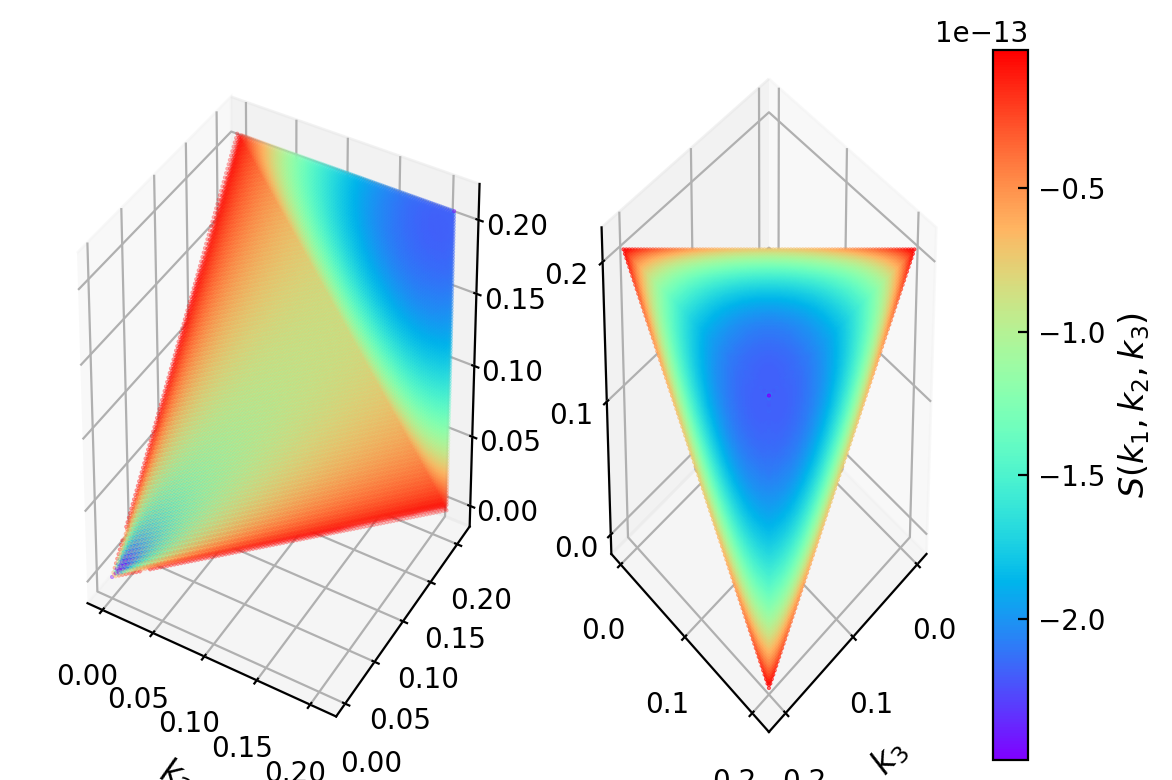

In [4]:
gcf.print_and_plot_tetra(k_min, k_max, cs_dbi, basis_funcs, 'temp.csv', Nk=100, title='', override_colour=None)

If you're wondering why the colour along the center-line of the side-faces isn't uniform, it's because we are
limited to the cube $[k_{min},k_{max}]$, so at the bottom corner $(k_{min},k_{min},k_{min})$ there is no squeezed limit,
only the equilateral limit.

Getting the 3d view is great, but in practice it can be more useful to take individual lines through the tetrapyd.
Below we plot the flattened limit ($k_3/k_2=2$), equilateral limit ($k_3/k_2=1$) and two lines in the squeezed limit.
Now we can clearly see the scaling of the shape function, relative to its amplitude. We can also see the slow-roll
suppressed becoming dominant in the deep squeezed limit, meaning that the shape doesn't go to zero in that limit
(it can't, as it needs to match with the consistency condition).

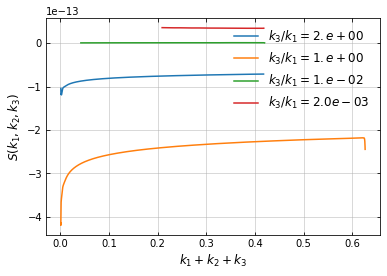

In [5]:
gcf.various_lines_plot(k_min, k_max, cs_dbi, basis_funcs, title='')

There may be some inaccuracies at the corners; the 3d plot can be used to get an understanding
of the affected volume, and the fractional_difference calls below can quantify whether the
effect matters or not.

Below we will check our coefficients against the DBI template, with and without scaling.

In [6]:
template = lambda x, y, z: DBI(x, y, z, scaling='no')
no_scale_diff = gcf.fractional_difference(k_min, k_max, template, cs_dbi, basis_funcs, Nk=200)
print('No scaling', round(no_scale_diff,4))

No scaling 0.0443


In [7]:
template = lambda x, y, z: DBI(x, y, z, scaling='prod')
prod_scale_diff = gcf.fractional_difference(k_min, k_max, template, cs_dbi, basis_funcs, Nk=200)
print('With scaling', round(prod_scale_diff,4))

With scaling 0.0067


The template with no scaling has a fractional error of a few percent, but by including
the scaling we can get that below percent-level. 

How well has the expansion converged? If you want to plot the full graph this can be a bit
slow, comparing to the set whose size is 5 smaller can be used as a proxy.

In [8]:
results = []
#for i in [30, 29, 28, 25, 20, 15, 5]:
for i in range(Pmax,5,-1):
    basis_funcs_reduced = gcf.set_up_log_basis(k_min, k_max, i, inv=True, verbose=False)
    cs_reduced = gcf.convert_between_bases(basis_funcs, basis_funcs_reduced, k_min, k_max, cs_dbi, Nk=600)
    cube_diff = gcf.err_between_coeffs(k_min, k_max, cs_dbi, basis_funcs, cs_reduced, basis_funcs_reduced, Ncorr=400, cube=True)
    tetr_diff = gcf.err_between_coeffs(k_min, k_max, cs_dbi, basis_funcs, cs_reduced, basis_funcs_reduced, Ncorr=400, cube=False)
    results.append([i, cube_diff, tetr_diff])
    print(*results[-1], flush=True)
results = np.array(results).T

30 4.507866588044679e-13 1.4233509036451195e-11
29 2.7067813027684954e-05 0.004415332463313535
28 8.48641665353825e-05 0.008905398612363731
27 0.00011647829160709708 0.004453533707708859
26 0.00011945741956771171 7.069261672628372e-05
25 0.00011945909866610428 0.00010168512746970752
24 0.0001194648857881443 0.00014908785261341735
23 0.000119480274219255 0.00023486788960147038
22 0.00011951816436677647 0.00030947763864597525
21 0.00011958533328835029 0.000446211103748398
20 0.00011974020888304164 0.0005912428667861096
19 0.00011993974922652798 0.0006998478661354809
18 0.00012037989483869882 0.0010243516432684144
17 0.00012094493363694904 0.0009745596538218609
16 0.00012179377600636089 0.0013296719440390199
15 0.0001231914767160938 0.0015925496405363206
14 0.00012517744452192952 0.0019353457788445565
13 0.00012816768310631798 0.002471166001533189
12 0.0001327673173600735 0.0032632256053184523
11 0.0001398963252568839 0.004344960914310792
10 0.00015137993665277857 0.006136432746343607
9 0

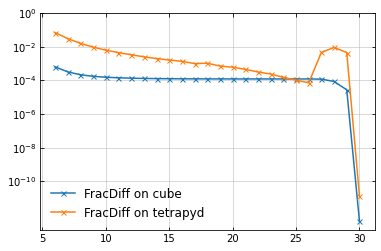

In [10]:
plt.plot(results[0], results[1], '-x', label='FracDiff on cube')
plt.plot(results[0], results[2], '-x', label='FracDiff on tetrapyd')
plt.yscale('log')
plt.yticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e0])
plt.legend()
plt.show()